In [13]:
import numpy as np
import predict as prd
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter

%matplotlib inline

In [14]:
def smoothen(data, sam=41):
    return savgol_filter(data, sam, 2, deriv=0)

# Always run whole script from the top!!!

In [15]:
df = pd.read_csv('all4.csv', sep=None)
# all4.csv is the name of the file

/home/ge0rg/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support sep=None with delim_whitespace=False; you can avoid this warning by specifying engine='python'.
  if __name__ == '__main__':


In [16]:
df

,Week,ipa bier: (Germany),pale ale bier: (Germany),helles bier: (Germany),porter bier: (Germany)
0,2012-09-30,19,0,41,14
1,2012-10-07,9,0,27,27
2,2012-10-14,9,9,18,15
3,2012-10-21,9,18,9,29
4,2012-10-28,13,9,29,26
5,2012-11-04,8,17,34,11
6,2012-11-11,9,0,23,12
7,2012-11-18,9,9,17,34
8,2012-11-25,8,8,23,17
9,2012-12-02,0,9,26,17


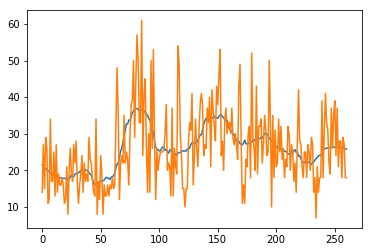

In [17]:
colname = 'porter bier: (Germany)' #select column

plt.plot(smoothen(df[colname], sam=41))
# sam is a smoothing parameter

plt.plot(df[colname])

In [18]:
df[colname] = smoothen(df[colname], sam=41)
# sam is a smoothing varaible
df.to_csv(path_or_buf='text.csv')

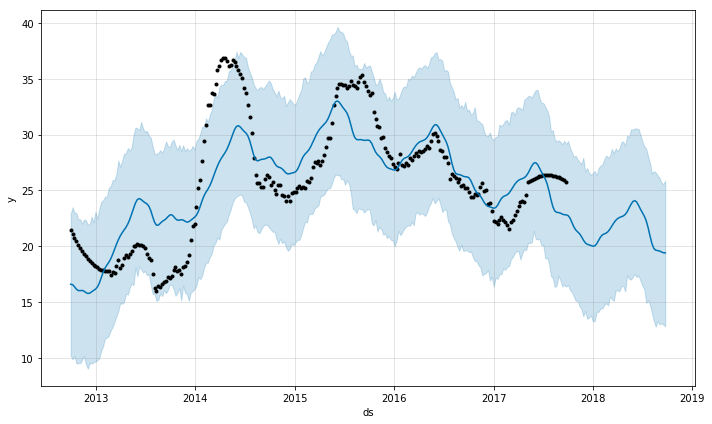

In [20]:
prd.predict('text.csv', 'test.csv', colname, periods=52, ws=False, predfreq='W')
# predfreq is 'W' for google data and 'M' for the rest (weekly/monthly)

/home/ge0rg/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support sep=None with delim_whitespace=False; you can avoid this warning by specifying engine='python'.
  if __name__ == '__main__':


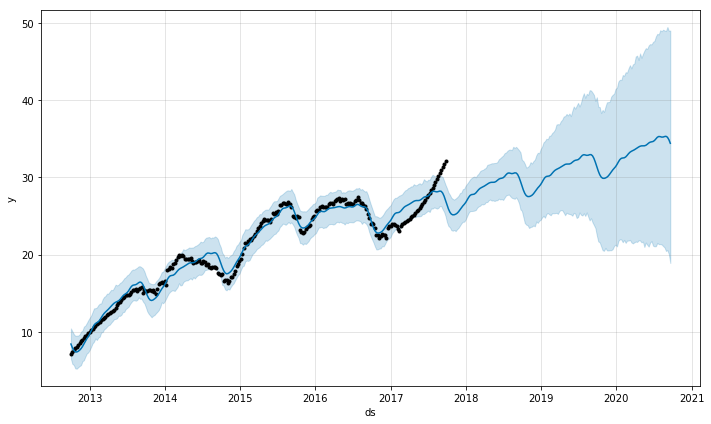

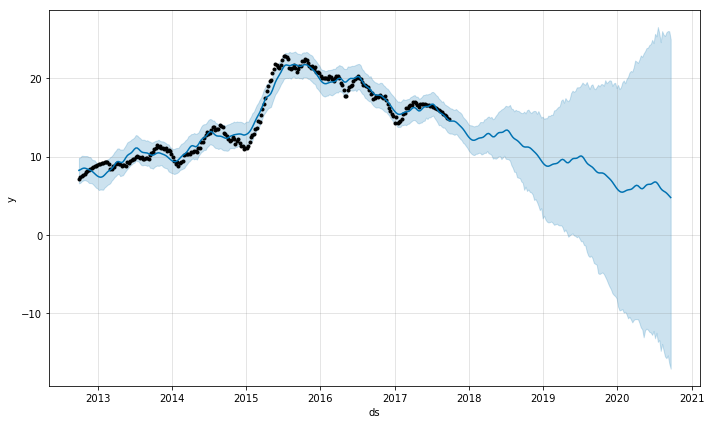

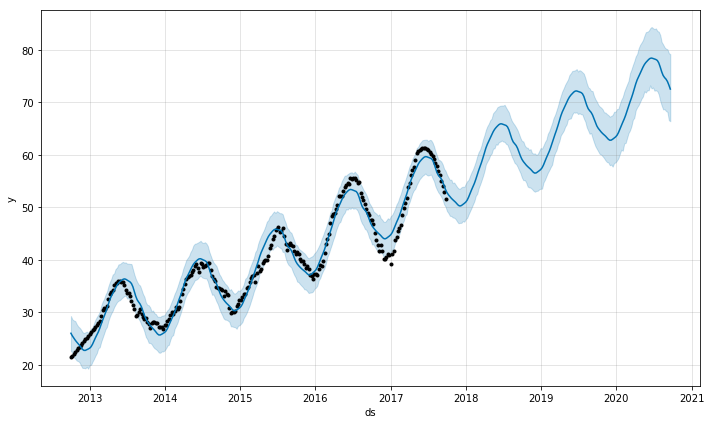

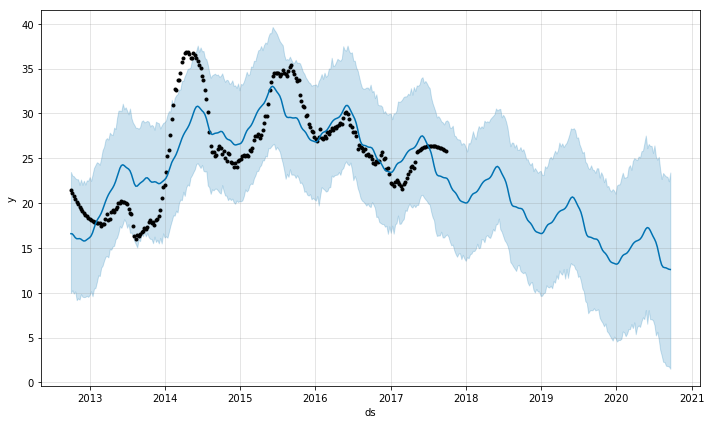

In [21]:
df = pd.read_csv('all4.csv', sep=None)
# name of file!

colnames = ['ipa bier: (Germany)', 'pale ale bier: (Germany)', 'helles bier: (Germany)', 'porter bier: (Germany)']
sams = [61, 41, 41, 41]
# smoothing parameters for all beers

for k, colname in enumerate(colnames):
    df[colname] = smoothen(df[colname], sam=sams[k])
    df.to_csv(path_or_buf=colname+'_ts'+'.csv')
    # change names!
    prd.predict(colname+'_ts'+'.csv', colname+'_s.csv', colname, periods=156, ws=False, predfreq='W')
    #select 'W' for weeks, 'M' for months
    # periods: number f weeks/months

In [9]:
df = pd.read_csv('helles bier: (Germany).csv', sep=None)

/home/ge0rg/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support sep=None with delim_whitespace=False; you can avoid this warning by specifying engine='python'.
  if __name__ == '__main__':


In [10]:
df

,Unnamed: 0,ds,t,trend,seasonal_lower,seasonal_upper,trend_lower,trend_upper,yhat_lower,yhat_upper,yearly,yearly_lower,yearly_upper,seasonal,yhat
0,0,2012-09-30,0.000000,28.362815,-2.349339,-2.349339,28.362815,28.362815,22.815165,29.166729,-2.349339,-2.349339,-2.349339,-2.349339,26.013476
1,1,2012-10-07,0.003846,28.410881,-2.895667,-2.895667,28.410881,28.410881,22.034129,28.863703,-2.895667,-2.895667,-2.895667,-2.895667,25.515213
2,2,2012-10-14,0.007692,28.458946,-3.366996,-3.366996,28.458946,28.458946,21.951023,28.237250,-3.366996,-3.366996,-3.366996,-3.366996,25.091950
3,3,2012-10-21,0.011538,28.507012,-3.807950,-3.807950,28.507012,28.507012,21.408059,28.004682,-3.807950,-3.807950,-3.807950,-3.807950,24.699062
4,4,2012-10-28,0.015385,28.555078,-4.205184,-4.205184,28.555078,28.555078,20.791808,27.595556,-4.205184,-4.205184,-4.205184,-4.205184,24.349894
5,5,2012-11-04,0.019231,28.603143,-4.565517,-4.565517,28.603143,28.603143,20.508649,27.340090,-4.565517,-4.565517,-4.565517,-4.565517,24.037627
6,6,2012-11-11,0.023077,28.651209,-4.946452,-4.946452,28.651209,28.651209,20.546452,27.130876,-4.946452,-4.946452,-4.946452,-4.946452,23.704757
7,7,2012-11-18,0.026923,28.699275,-5.378293,-5.378293,28.699275,28.699275,19.899771,26.669734,-5.378293,-5.378293,-5.378293,-5.378293,23.320982
8,8,2012-11-25,0.030769,28.747341,-5.786916,-5.786916,28.747341,28.747341,19.614987,26.312522,-5.786916,-5.786916,-5.786916,-5.786916,22.960424
9,9,2012-12-02,0.034615,28.795406,-6.042520,-6.042520,28.795406,28.795406,19.253193,26.185453,-6.042520,-6.042520,-6.042520,-6.042520,22.752886


In [12]:
df = pd.read_csv('all4.csv', sep=None)
colnames = ['ipa bier: (Germany)', 'pale ale bier: (Germany)', 'helles bier: (Germany)', 'porter bier: (Germany)']
sams = [61, 41, 41, 41]

for k, colname in enumerate(colnames):
    data = smoothen(df[colname], sam=sams[k])
    np.savetxt(colname+'_sy'+".csv", data, delimiter=",")
    
#same, saves historical data

/home/ge0rg/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support sep=None with delim_whitespace=False; you can avoid this warning by specifying engine='python'.
  if __name__ == '__main__':


t_now = 260 for google data